<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [91]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [92]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [93]:
np.isnan(df['Freedom']).any()

True

In [94]:
df['Freedom'] = np.nan_to_num(df['Freedom'])

### Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

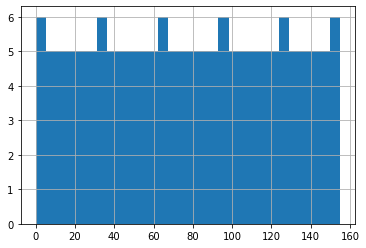

In [95]:
df.Freedom.hist(bins=30) 
plt.show()

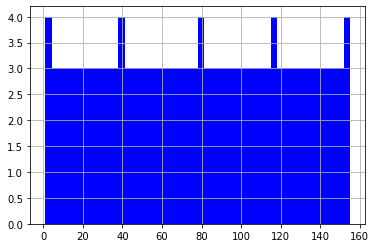

In [96]:
plt.hist(df['Positive affect'], 50, facecolor='b')
plt.grid(True)
plt.show()

У обоих параметров равномерное распределение

### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [97]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  77.5


In [98]:
print('Значение моды: ', statistics.mode(df['Freedom']))

Значение моды:  5.0


In [99]:
 print('Математическое ожидание: ', statistics.median(df['Freedom']))

Математическое ожидание:  77.5


In [100]:
print('Стандартное отклонение: ', statistics.pstdev(df['Freedom']))

Стандартное отклонение:  45.032395746469746


In [101]:
print('Дисперсия: ', statistics.pvariance(df['Freedom']))

Дисперсия:  2027.9166666666667


In [102]:
min(df['Freedom'])

0.0

In [103]:
max(df['Freedom'])

155.0

In [104]:
print('Размах: ', max(df['Freedom']) - min(df['Freedom']))

Размах:  155.0


Для определения выбросов построим скаттер плот

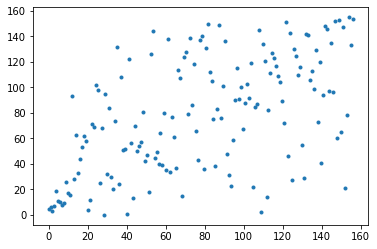

In [105]:
len_column = len(df['Freedom']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['Freedom'], marker='.')

На графике видно, что все значения распределены равномерно, имеется большой размах, выбросов нет

### Почему нельзя найти моду?

Мода - это значение выборки, которое встречается наибольшее количество раз. Так как колонка Freedom имеет равномерное распределение, у нее нет моды.

### Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [0]:
скаттер и пирсон

In [106]:
np.isnan(df['Positive affect']).any()

True

In [107]:
df['Positive affect'] = np.nan_to_num(df['Positive affect'])

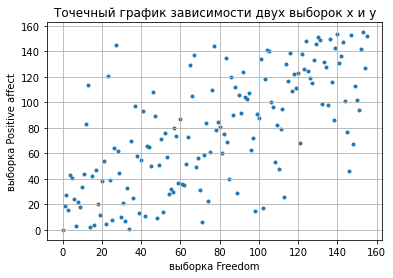

In [108]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

График показывает, что между переменными имеется корреляция, вычислим коэффициент Пирсона, чтобы определить численное значение корреляции

In [109]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6878506740844936


Коэффициент Пирсона = 0.69, что подтверждает, что между переменными имеется корреляция. Чем выше степень свободы - тем больше положительных эмоций

### Нормализовать данные колонки Freedom (централизация + масштабирование)

Так как среднее значение не равно 0, необходимо нормализовать. То есть привести среднее значение к 0 чтобы точки на графике были в начале осей координат

In [110]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [111]:
min(freedom_1)

-77.5

In [112]:
max(freedom_1)

77.5

In [113]:
# подключаем модуль для масштабирования, в ф ренж указали диапазон
# fit_transform - метод для масштабирования выборок, передаем выборку, 
# переводим ее в np.array, указываем диапазон
# туда можно передать сразу несколько выборок


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

# проверяем мин и макс значения выборки, они равны -1 и 1

[-1.]
[1.]


### Построить матрицу корреляций для всех колонок таблицы

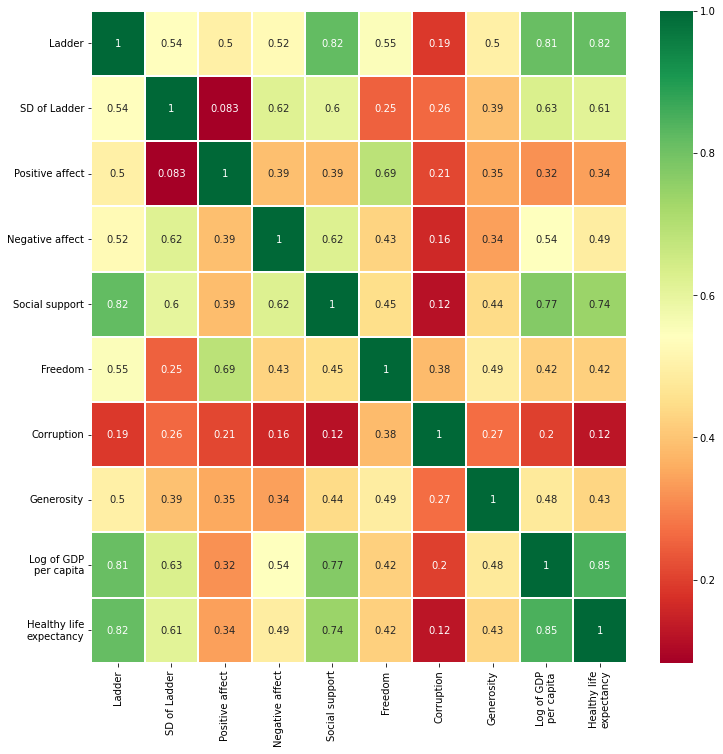

In [114]:
import seaborn as sns
# 
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()



### В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

Ladder ( мера удовлетворенности жизнью) сильно коррелирует с Social support (социальная поддержка); c Log of GDP per capita (ВВП на душу населения); c Healthy life expectancy (продолжительность жизни).

Отдельно стоит упомянуть, что Log of GDP per capita (ВВП на душу населения) сильно коррелирует с Healthy life expectancy (продолжительность жизни). Чем выше ВВП на душу населения, тем больше продолжительность жизни, скорее всего это связано с расходами на здравоохранение.

### Загрузить таблицу цен на авокадо: 

In [115]:
import io
import requests
df = pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


### Сделать частотный график колонки AveragePrice. Какое это распределение?

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


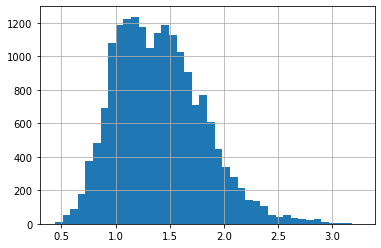

In [117]:
df.AveragePrice.hist(bins=40) 
plt.show()

График показал, что AveragePrice является нормальным распределением. График имеет ярко выраженную вершину, с обеих сторон которой расположены все значения

### Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

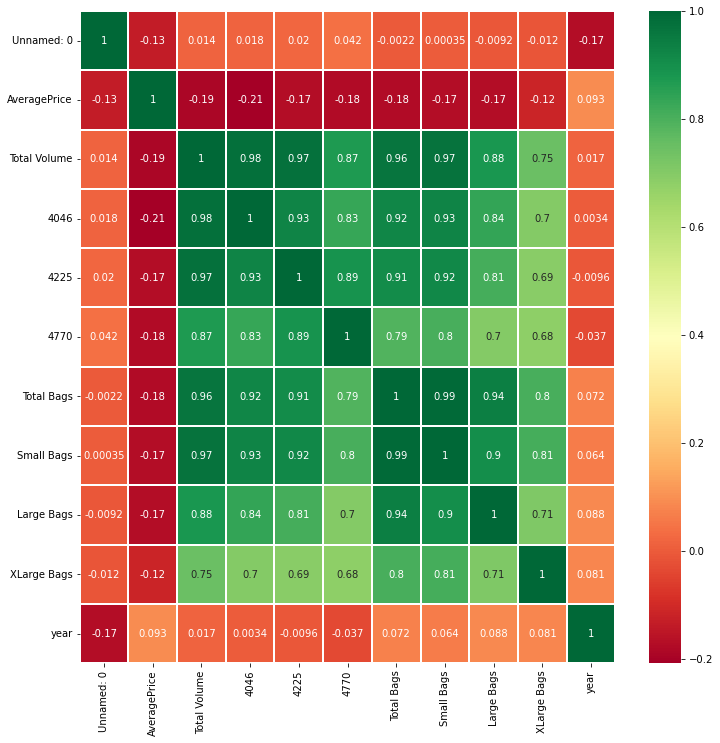

In [118]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Матрица корреляций показывает, что при увеличении объема продаж каждого размера авокадо, средняя стоимость одного авокадо снижалась. То есть, чем ниже средняя цена на 1 авокадо, тем больше его покупают, эта связь характерна для всех размеров авокадо. Наибольшая отрицательная корреляция между 4046 и AveragePrice, что логично - у авокадо размера small/medium цена ниже, чем у large  или extra large

In [0]:
авокадо дорогой по цене и он влияет на среднюю стоимост

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb